<a href="https://colab.research.google.com/github/shihweipan/GWU_DNSC_6301_Project/blob/main/DNSC_6301_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pythons imports

In [ ]:
from sklearn import tree                                  # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split      # for partitioning data
from sklearn.model_selection import cross_val_score       # for cross validation
from sklearn.metrics import roc_auc_score, accuracy_score # to assess decision tree performance

# to upload local files
import io
from google.colab import files             

import numpy as np                                   # array, vector, matrix calculations
import pandas as pd                                  # dataFrame handling

from matplotlib import pyplot as plt                 # plotting
import seaborn as sns                                # slightly better plotting  

from tqdm import tqdm                                # loading bar 

SEED = 99                                            # ALWAYS use a random seed for better reproducibility

In [ ]:
# print version information 
import sys
import sklearn
version = ".".join(map(str, sys.version_info[:3]))
print('Python version:', version)
print('sklearn version:', sklearn.__version__)

Python version: 3.7.13
sklearn version: 1.0.2


#### Upload training data

In [ ]:
 # special google collab command to upload a file from computer
uploaded = files.upload()

Saving Project Data - credit_line_increase.csv to Project Data - credit_line_increase.csv


In [ ]:
uploaded.keys() # what is stored in that Python object?

dict_keys(['Project Data - credit_line_increase.csv'])

In [ ]:
# read uploaded data into a pandas dataframe
data = pd.read_csv(io.StringIO(uploaded['Project Data - credit_line_increase.csv'].decode('utf-8')))

In [ ]:
data.head(10)

ID  LIMIT_BAL  SEX  RACE  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000    2   1.0          2         1   24      2      2     -1   
1   2     120000    2   2.0          2         2   26     -1      2      0   
2   3      90000    2   3.0          2         2   34      0      0      0   
3   4      50000    2   4.0          2         1   37      0      0      0   
4   5      50000    1   3.0          2         1   57     -1      0     -1   
5   6      50000    1   4.0          1         2   37      0      0      0   
6   7     500000    1   4.0          1         2   29      0      0      0   
7   8     100000    2   4.0          2         2   23      0     -1     -1   
8   9     140000    2   2.0          3         1   28      0      0      2   
9  10      20000    1   4.0          3         2   35     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   
5  ...      19394      19619      20024      2500      1815       657   
6  ...     542653     483003     473944     55000     40000     38000   
7  ...        221       -159        567       380       601         0   
8  ...      12211      11793       3719      3329         0       432   
9  ...          0      13007      13912         0         0         0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DELINQ_NEXT  
0         0         0         0            1  
1      1000         0      2000            1  
2      1000      1000      5000            0  
3      1100      1069      1000            0  
4      9000       689       679            0  
5      1000      1000       800            0  
6     20239     13750     13770            0  
7       581      1687      1542            0  
8      1000      1000      1000            0  
9     13007      1122         0            0  

[10 rows x 26 columns]

#### Data Dictionary

| Name | Modeling Role | Measurement Level| Description|
| ---- | ------------- | ---------------- | ---------- |
|**ID**| ID | int | unique row indentifier |
| **LIMIT_BAL** | input | float | amount of previously awarded credit |
| **SEX** | demographic information | int | 1 = male; 2 = female
| **RACE** | demographic information | int | 1 = hispanic; 2 = black; 3 = white; 4 = asian |
| **EDUCATION** | demographic information | int | 1 = graduate school; 2 = university; 3 = high school; 4 = others |
| **MARRIAGE** | demographic information | int | 1 = married; 2 = single; 3 = others |
| **AGE** | demographic information | int | age in years |
| **PAY_0, PAY_2 - PAY_6** | inputs | int | history of past payment; PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; ...; PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above |
| **BILL_AMT1 - BILL_AMT6** | inputs | float | amount of bill statement; BILL_AMNT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; ...; BILL_AMT6 = amount of bill statement in April, 2005 |
| **PAY_AMT1 - PAY_AMT6** | inputs | float | amount of previous payment; PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; ...; PAY_AMT6 = amount paid in April, 2005 |
| **DELINQ_NEXT**| target | int | whether a customer's next payment is delinquent (late), 1 = late; 0 = on-time |

#### Basic Data Analysis

In [ ]:
data.shape # (rows, columns)

(30000, 26)

In [ ]:
data.columns # Determine the names of the columns in the training data.

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [ ]:
data.isnull().sum() # Determine whether any missing values exist in the training data.

ID             0
LIMIT_BAL      0
SEX            0
RACE           0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
DELINQ_NEXT    0
dtype: int64

In [ ]:
data.describe() # Calculate basic descriptive statistics for the data.

ID       LIMIT_BAL           SEX          RACE     EDUCATION  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      2.721967      1.853133   
std     8660.398374   129747.661567      0.489129      1.094397      0.790349   
min        1.000000    10000.000000      1.000000      1.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      2.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      3.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      4.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      6.000000   

           MARRIAGE           AGE         PAY_0         PAY_2         PAY_3  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.551867     35.485500     -0.016700     -0.133767     -0.166200   
std        0.521970      9.217904      1.123802      1.197186      1.196868   
min        0.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%        1.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%        2.000000     34.000000      0.000000      0.000000      0.000000   
75%        2.000000     41.000000      0.000000      0.000000      0.000000   
max        3.000000     79.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6   DELINQ_NEXT  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 26 columns]

In [ ]:
corr = data.corr() # Calculate a Pearson correlation matrix for the data.
corr

ID  LIMIT_BAL       SEX      RACE  EDUCATION  MARRIAGE  \
ID           1.000000   0.026179  0.018497 -0.000710   0.039177 -0.029079   
LIMIT_BAL    0.026179   1.000000  0.024755  0.044173  -0.219161 -0.108139   
SEX          0.018497   0.024755  1.000000  0.006149   0.014232 -0.031389   
RACE        -0.000710   0.044173  0.006149  1.000000  -0.012796  0.007010   
EDUCATION    0.039177  -0.219161  0.014232 -0.012796   1.000000 -0.143464   
MARRIAGE    -0.029079  -0.108139 -0.031389  0.007010  -0.143464  1.000000   
AGE          0.018678   0.144713 -0.090874  0.001284   0.175061 -0.414170   
PAY_0       -0.030575  -0.271214 -0.057643 -0.102487   0.105364  0.019917   
PAY_2       -0.011215  -0.296382 -0.070771 -0.082986   0.121566  0.024199   
PAY_3       -0.018494  -0.286123 -0.066096 -0.074547   0.114025  0.032688   
PAY_4       -0.002735  -0.267460 -0.060173 -0.072259   0.108793  0.033122   
PAY_5       -0.022199  -0.249411 -0.055064 -0.067316   0.097520  0.035629   
PAY_6       -0.020270  -0.235195 -0.044008 -0.054935   0.082316  0.034345   
BILL_AMT1    0.019389   0.285430 -0.033642  0.004232   0.023581 -0.023472   
BILL_AMT2    0.017982   0.278314 -0.031183  0.002459   0.018749 -0.021602   
BILL_AMT3    0.024354   0.283236 -0.024563  0.000543   0.013002 -0.024909   
BILL_AMT4    0.040351   0.293988 -0.021880  0.000376  -0.000451 -0.023344   
BILL_AMT5    0.016705   0.295562 -0.017005  0.002096  -0.007567 -0.025393   
BILL_AMT6    0.016730   0.290389 -0.016733  0.002756  -0.009099 -0.021207   
PAY_AMT1     0.009742   0.195236 -0.000242  0.030069  -0.037456 -0.005979   
PAY_AMT2     0.008406   0.178408 -0.001391  0.012681  -0.030038 -0.008093   
PAY_AMT3     0.039151   0.210167 -0.008597  0.021854  -0.039943 -0.003541   
PAY_AMT4     0.007793   0.203242 -0.002229  0.026047  -0.038218 -0.012659   
PAY_AMT5     0.000652   0.217202 -0.001667  0.022148  -0.040358 -0.001205   
PAY_AMT6     0.003000   0.219595 -0.002766  0.020259  -0.037200 -0.006641   
DELINQ_NEXT -0.013952  -0.153520 -0.039961 -0.303811   0.028006 -0.024339   

                  AGE     PAY_0     PAY_2     PAY_3  ...  BILL_AMT4  \
ID           0.018678 -0.030575 -0.011215 -0.018494  ...   0.040351   
LIMIT_BAL    0.144713 -0.271214 -0.296382 -0.286123  ...   0.293988   
SEX         -0.090874 -0.057643 -0.070771 -0.066096  ...  -0.021880   
RACE         0.001284 -0.102487 -0.082986 -0.074547  ...   0.000376   
EDUCATION    0.175061  0.105364  0.121566  0.114025  ...  -0.000451   
MARRIAGE    -0.414170  0.019917  0.024199  0.032688  ...  -0.023344   
AGE          1.000000 -0.039447 -0.050148 -0.053048  ...   0.051353   
PAY_0       -0.039447  1.000000  0.672164  0.574245  ...   0.179125   
PAY_2       -0.050148  0.672164  1.000000  0.766552  ...   0.222237   
PAY_3       -0.053048  0.574245  0.766552  1.000000  ...   0.227202   
PAY_4       -0.049722  0.538841  0.662067  0.777359  ...   0.245917   
PAY_5       -0.053826  0.509426  0.622780  0.686775  ...   0.271915   
PAY_6       -0.048773  0.474553  0.575501  0.632684  ...   0.266356   
BILL_AMT1    0.056239  0.187068  0.234887  0.208473  ...   0.860272   
BILL_AMT2    0.054283  0.189859  0.235257  0.237295  ...   0.892482   
BILL_AMT3    0.053710  0.179785  0.224146  0.227494  ...   0.923969   
BILL_AMT4    0.051353  0.179125  0.222237  0.227202  ...   1.000000   
BILL_AMT5    0.049345  0.180635  0.221348  0.225145  ...   0.940134   
BILL_AMT6    0.047613  0.176980  0.219403  0.222327  ...   0.900941   
PAY_AMT1     0.026147 -0.079269 -0.080701  0.001295  ...   0.233012   
PAY_AMT2     0.021785 -0.070101 -0.058990 -0.066793  ...   0.207564   
PAY_AMT3     0.029247 -0.070561 -0.055901 -0.053311  ...   0.300023   
PAY_AMT4     0.021379 -0.064005 -0.046858 -0.046067  ...   0.130191   
PAY_AMT5     0.022850 -0.058190 -0.037093 -0.035863  ...   0.160433   
PAY_AMT6     0.019478 -0.058673 -0.036500 -0.035861  ...   0.177637   
DELINQ_NEXT  0.013890  0.324794  0.263551  0.235253  ...  -0.010156   

             BILL_AMT

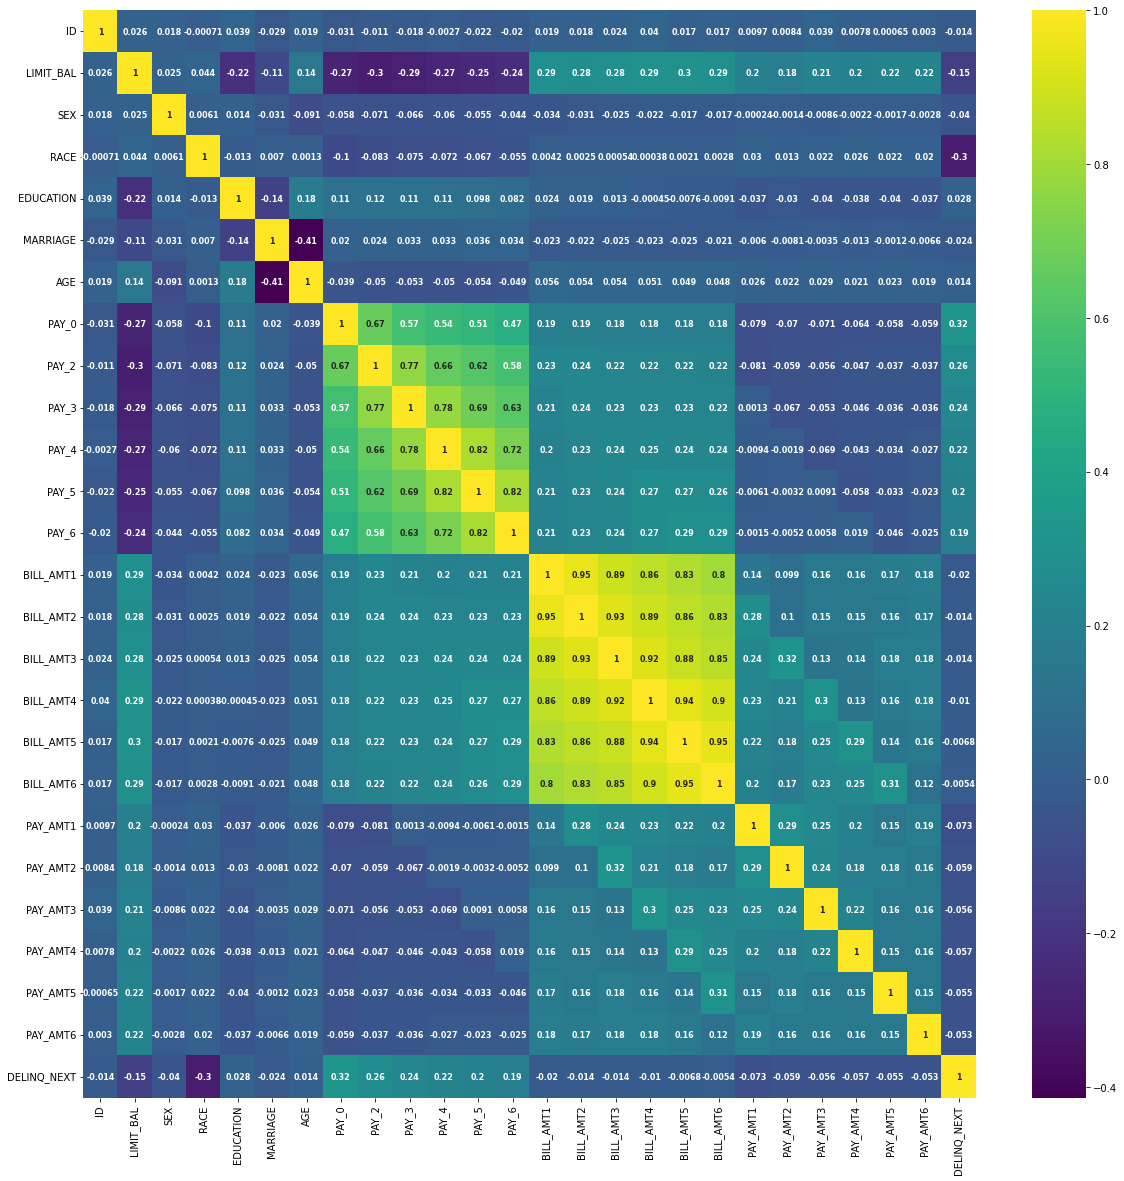

In [ ]:
# Plot a Pearson correlation heatmap for the data.
plt.figure(figsize=(20, 20))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, 
                cmap='viridis',
                annot=True,
                annot_kws={'size':8,'weight':'bold'})

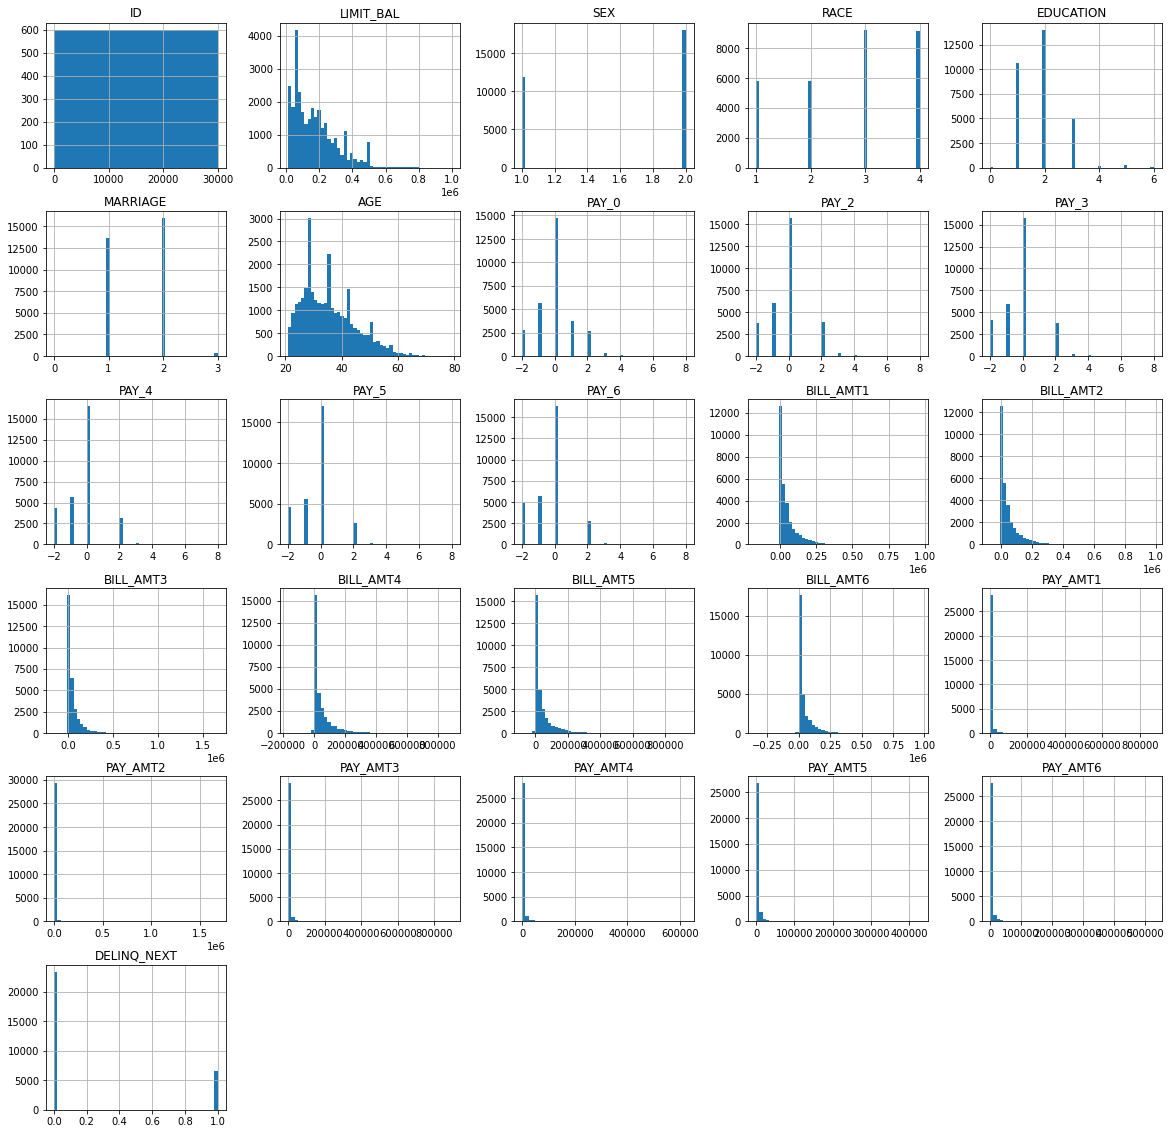

In [ ]:
_ = data[data.columns].hist(bins=50, figsize=(20, 20)) # Plot histograms for all the columns in the data.

#### Train decision tree 

In [ ]:
# assign basic modeling roles
# do not put demographic variables into a financial model!
X_cols = [name for name in data.columns if name not in ['ID', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE', 'DELINQ_NEXT']]
y_cols = ['DELINQ_NEXT']

In [ ]:
# partition data for honest assessment
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_cols], data[y_cols], test_size=0.4, random_state=SEED) # split off training data

valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED) # split remainder into validation and test

# summarize 
print(f'Training data: {train_X.shape[0]} rows and {train_X.shape[1] + 1} columns')     # 60% train data
print(f'Validation data: {valid_X.shape[0]} rows and {valid_X.shape[1] + 1} columns')   # 20% valid data
print(f'Testing data: {test_X.shape[0]} rows and {test_X.shape[1] + 1} columns')        # 20% test data

# housekeeping
del valid_test_X, valid_test_y

Training data: 18000 rows and 20 columns
Validation data: 6000 rows and 20 columns
Testing data: 6000 rows and 20 columns


##### Post-Pruning : ALPHA

In [ ]:
# train decision tree 

model = tree.DecisionTreeClassifier(random_state=SEED)
model.fit(train_X, train_y)

# compute ccp_alpha values
path = model.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in tqdm(ccp_alphas):
    model = tree.DecisionTreeClassifier(random_state=SEED, ccp_alpha=ccp_alpha)
    model.fit(train_X, train_y)
    clfs.append(model)

100%|██████████| 1147/1147 [09:30<00:00,  2.01it/s]


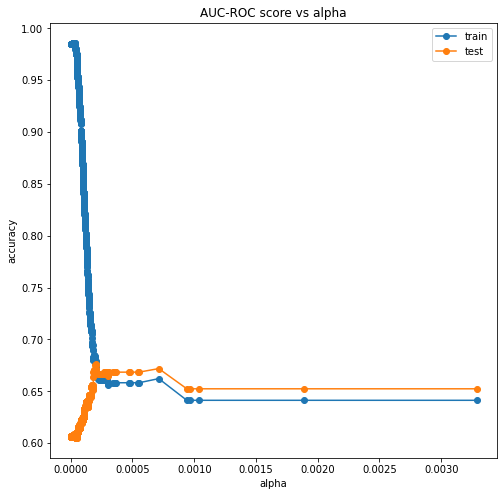

In [ ]:
# plot tree alpha vs. training and validation AUC
# using simple pandas plotting and matplotlib
# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# calculate auc from train and valid data
train_scores = [roc_auc_score(train_y, clf.predict(train_X)) for clf in clfs]
test_scores = [roc_auc_score(valid_y, clf.predict(valid_X)) for clf in clfs]

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

##### Cross Validation : DEPTH

In [ ]:
# train decision tree 
# with validation-based early stopping

max_depth = 20
candidate_models = {}

for depth in tqdm(range(0, max_depth)):

  model = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  model.fit(train_X, train_y)

  train_proba = model.predict_proba(train_X)[:, 1]
  valid_proba = model.predict_proba(valid_X)[:, 1]

  # calculate auc from train and valid data
  train_auc = roc_auc_score(train_y, train_proba)
  valid_auc = roc_auc_score(valid_y, valid_proba)

  cv_scores = cross_val_score(model, valid_X, valid_y, scoring='roc_auc', cv=5) # 5-fold cross validation
  cv_std = np.std(cv_scores)

  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = model
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std

100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


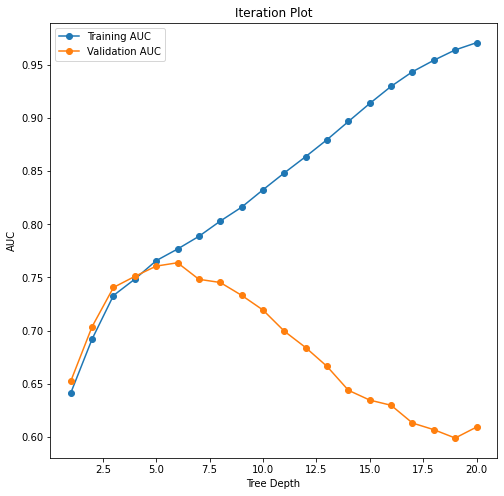

In [ ]:
# plot tree depth vs. training and validation AUC
# using simple pandas plotting and matplotlib
# Plot train and test score for each of the above trained model    
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot', marker='o', ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

In [ ]:
# veiw same results as a table, using pandas iloc to remove first column of table
candidate_results.iloc[:, 1:]

Training AUC  Validation AUC  5-Fold SD
1       0.641367        0.652452   0.007965
2       0.692113        0.703766   0.014767
3       0.733044        0.740628   0.009125
4       0.748443        0.751006   0.008237
5       0.765782        0.760682   0.013529
6       0.776733        0.763840   0.019140
7       0.788668        0.748281   0.014854
8       0.802992        0.745292   0.017962
9       0.816080        0.733223   0.019062
10      0.832419        0.719415   0.009521
11      0.848311        0.699499   0.014901
12      0.863631        0.684096   0.009305
13      0.879547        0.666395   0.013229
14      0.896630        0.643944   0.018922
15      0.913592        0.634721   0.015617
16      0.929671        0.629846   0.018662
17      0.943429        0.613150   0.023878
18      0.954195        0.606919   0.017963
19      0.963902        0.599065   0.017561
20      0.970715        0.609386   0.010017

In [ ]:
# plot the tree for human interpretation
best_model = candidate_models[6]['Model'] # select the model with the best accuracy score
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=X_cols,
                   class_names=['On time', 'Delinquent'],
                   filled=True)

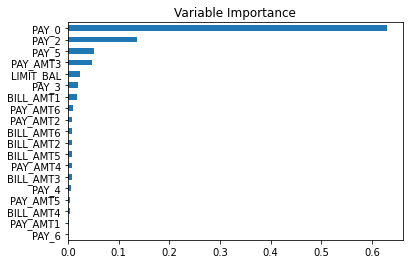

In [ ]:
# plot variable importances
# create pandas dataframe
# plot dataframe values
fi = pd.DataFrame(best_model.feature_importances_,
                           index=X_cols,
                           columns=['Importance'])
_ = fi.sort_values(by='Importance').plot(kind='barh', title='Variable Importance', legend=False)

In [ ]:
# score on test data for 
# final HONEST assessment
# this is not to see how well the model *did*!
# it's to get an assessment of how it *will do* on unseen data!
test_proba = best_model.predict_proba(test_X)[:, 1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_proba))

Test AUC: 0.7476


#### Function to create confusion matrices

In [ ]:
# function for confusion matrices
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

    level_list = list(frame[y].unique())
    level_list.sort(reverse=True)

    # create an empty dataframe
    cm_frame = pd.DataFrame(columns=['actual: ' +  str(i) for i in level_list],
                            index=['predicted: ' + str(i) for i in level_list])

    frame_ = frame.copy(deep=True)

    name = f'_{y}'
    frame_[name] = np.where(frame_[yhat] > cutoff , 1, 0)

    # filter data
    if (by is not None) & (level is not None):
        frame_ = frame_[frame[by] == level]

    # calculate confusion matrix, including TP, TN, FP, FN
    for i, lev_i in enumerate(level_list):
        for j, lev_j in enumerate(level_list):
            cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[name] == lev_j)].shape[0]

    if verbose:
        if by is None:
            print('Confusion matrix:')
        else:
            print(f'Confusion matrix by {by} = {level}')

    return cm_frame


#### Function to calculate AIR

In [ ]:
# function for AIR
def air(cm_dict, reference_key, protected_key, verbose=True):

    eps = 1e-20
    
    # summary [prediction = False] from reference
    reference_accepted = float(cm_dict[reference_key].iloc[1,0] + cm_dict[reference_key].iloc[1,1])
    reference_total = float(cm_dict[reference_key].sum().sum())
    # calculate the ratio from reference
    reference_prop = reference_accepted / reference_total

    # summary [prediction = False] from protected
    protected_accepted = float(cm_dict[protected_key].iloc[1,0] + cm_dict[protected_key].iloc[1,1]) 
    protected_total = float(cm_dict[protected_key].sum().sum())
    # calculate the ratio from protected
    protected_prop = protected_accepted/protected_total

    if verbose:
        print('%s proportion accepted: %.4f' % (reference_key.title(), reference_prop))
        print('%s proportion accepted: %.4f' % (protected_key.title(), protected_prop))

    return ((protected_prop + eps)/(reference_prop + eps))

#### Bias testing

In [ ]:
# add probabilities onto validation set
# note we need a probability cutoff to make a final lending decision
valid_yhat = pd.DataFrame(valid_X, columns=X_cols)
valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_cols]  = valid_y
valid_yhat['proba'] = best_model.predict_proba(valid_X)[:, 1]
valid_yhat.head(10)

LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
8703      500000      0      0      0      0      0      0     151630   
4710       50000      1     -1      0      0     -1     -1      30382   
27499      20000      3      2      3      3      2      2       6015   
352       380000      1     -2     -2     -2     -2     -2          0   
3716      230000     -2     -2     -2     -2     -2     -2          0   
11792      80000      0      0     -1     -1     -1     -2      22747   
440        50000     -1     -1     -1     -1      0      0        350   
18459      30000      0      0      2      0      0      0      20194   
8481      310000     -1     -1     -1     -1     -1     -1        833   
528       360000      1     -2     -2     -2     -1     -1         -8   

       BILL_AMT2  BILL_AMT3  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
8703      150824     117130  ...     12074     10000     40561     12550   
4710       45888      48599  ...     54608      7060       112     32132   
27499       7759       8486  ...      2000      1000         0         0   
352            0          0  ...         0         0         0         0   
3716           0          0  ...         0         0         0         0   
11792      16260       6500  ...      3002      6500     15525         0   
440          350        400  ...       350       400      1695     11300   
18459      24860      24180  ...      5000         0      2000      1500   
8481         323       1083  ...       323      1093      2140      9201   
528           -8         -8  ...         0         0         0      1685   

       PAY_AMT5  PAY_AMT6  RACE  SEX  DELINQ_NEXT     proba  
8703      20803     65678   4.0    1            0  0.079611  
4710      11304     52681   4.0    2            0  0.160221  
27499      1000         0   3.0    1            1  0.763672  
352           0         0   2.0    1            1  0.366730  
3716          0         0   3.0    2            0  0.199716  
11792         0         0   4.0    2            0  0.079611  
440         485      2400   4.0    1            0  0.149024  
18459      5000      2528   1.0    2            0  0.273292  
8481       2103      6571   1.0    2            0  0.142395  
528        2613         0   1.0    1            0  0.160221  

[10 rows x 23 columns]

In [ ]:
# calculate confusion matrices across race groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
race_dict = {'hispanic': 1,
             'black': 2,
             'white': 3,
             'asian': 4}

race_cm_dict = {}

for key, value in race_dict.items():
    race_cm_dict[key] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='RACE', level=value, cutoff=0.15)
    print(race_cm_dict[key])
    print(f'{key.title()}')
    print()

for name in list(race_dict.keys()):
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()

Confusion matrix by RACE = 1
             actual: 1 actual: 0
predicted: 1       347       247
predicted: 0       146       471
Hispanic

Confusion matrix by RACE = 2
             actual: 1 actual: 0
predicted: 1       343       196
predicted: 0       143       463
Black

Confusion matrix by RACE = 3
             actual: 1 actual: 0
predicted: 1       135       527
predicted: 0        54      1107
White

Confusion matrix by RACE = 4
             actual: 1 actual: 0
predicted: 1       153       499
predicted: 0        58      1111
Asian

White proportion accepted: 0.6369
Hispanic proportion accepted: 0.5095
hispanic-to-white AIR: 0.80

White proportion accepted: 0.6369
Black proportion accepted: 0.5293
black-to-white AIR: 0.83

White proportion accepted: 0.6369
Asian proportion accepted: 0.6420
asian-to-white AIR: 1.01



In [ ]:
# calculate confusion matrices across sex groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR 
sex_dict = {'male': 1,
            'female': 2}

sex_cm_dict = {}

for key, value in sex_dict.items():
    sex_cm_dict[key] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='SEX', level=value, cutoff=0.15)
    print(sex_cm_dict[key])
    print(f'{key.title()}')
    print()

for name in list(sex_dict.keys()):
    if name != 'male':
        print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
        print()

Confusion matrix by SEX = 1
             actual: 1 actual: 0
predicted: 1       386       587
predicted: 0       160      1180
Male

Confusion matrix by SEX = 2
             actual: 1 actual: 0
predicted: 1       592       882
predicted: 0       241      1972
Female

Male proportion accepted: 0.5793
Female proportion accepted: 0.6002
female-to-male AIR: 1.04



#### Bias Remediation

In [ ]:
# function to calculate accuracy at a certain probability cutoff
def get_acc(frame, cutoff, y_name, yhat_name):
  y_ture = frame[y_name]
  y_pred = np.where(frame[yhat_name] > cutoff , 1, 0)
  return accuracy_score(y_ture, y_pred)

In [ ]:
# observe accuracy trend as cutoff increases
# the problem is: higher cutoff means lending more money, even if more accurate
_ = 0
for cutoff in np.arange(0, 0.31, 0.01):
    acc = get_acc(valid_yhat, np.round(cutoff, 2), y_cols[0], 'proba')
    gap = acc - _
    _ = acc
    print('Accuracy at cutoff %.2f is: %.4f, difference : %.4f' % (np.round(cutoff, 2), acc, gap))   

Accuracy at cutoff 0.00 is: 0.2315, difference : 0.2315
Accuracy at cutoff 0.01 is: 0.2315, difference : 0.0000
Accuracy at cutoff 0.02 is: 0.2315, difference : 0.0000
Accuracy at cutoff 0.03 is: 0.2315, difference : 0.0000
Accuracy at cutoff 0.04 is: 0.2315, difference : 0.0000
Accuracy at cutoff 0.05 is: 0.2315, difference : 0.0000
Accuracy at cutoff 0.06 is: 0.2322, difference : 0.0007
Accuracy at cutoff 0.07 is: 0.2322, difference : 0.0000
Accuracy at cutoff 0.08 is: 0.5347, difference : 0.3025
Accuracy at cutoff 0.09 is: 0.5347, difference : 0.0000
Accuracy at cutoff 0.10 is: 0.5347, difference : 0.0000
Accuracy at cutoff 0.11 is: 0.5562, difference : 0.0215
Accuracy at cutoff 0.12 is: 0.5562, difference : 0.0000
Accuracy at cutoff 0.13 is: 0.5562, difference : 0.0000
Accuracy at cutoff 0.14 is: 0.5562, difference : 0.0000
Accuracy at cutoff 0.15 is: 0.6883, difference : 0.1322
Accuracy at cutoff 0.16 is: 0.6883, difference : 0.0000
Accuracy at cutoff 0.17 is: 0.6935, difference :

In [ ]:
# recalculate AIR and confusion matrices at different cutoff
for key, value in race_dict.items():
    race_cm_dict[key] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='RACE', level=value, cutoff=0.2, verbose=False)

for name in list(race_dict.keys()):
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()

for key, value in sex_dict.items():
    sex_cm_dict[key] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='SEX', level=value, cutoff=0.2, verbose=False)

for name in list(sex_dict.keys()):
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()

White proportion accepted: 0.7652
Hispanic proportion accepted: 0.6367
hispanic-to-white AIR: 0.83

White proportion accepted: 0.7652
Black proportion accepted: 0.6515
black-to-white AIR: 0.85

White proportion accepted: 0.7652
Asian proportion accepted: 0.7748
asian-to-white AIR: 1.01

Male proportion accepted: 0.6987
Female proportion accepted: 0.7342
female-to-male AIR: 1.05



In [ ]:
# redo model search with new information
# train decision tree 
# with validation-based early stopping
# and AIR calculation!
max_depth = 20
adv_candidate_models = {}

for depth in tqdm(range(0, max_depth)):

  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_X, train_y)

  train_proba = clf.predict_proba(train_X)[:, 1]
  valid_proba = clf.predict_proba(valid_X)[:, 1]

  # calculate auc from train and valid data
  train_auc = roc_auc_score(train_y, train_proba)
  valid_auc = roc_auc_score(valid_y, valid_proba)

  valid_yhat = pd.DataFrame(valid_X, columns=X_cols)
  valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
  valid_yhat[y_cols] = valid_y
  valid_yhat['proba'] = valid_proba

  # suitable cutoff value according to experiment results : 0.2
  cm_dict = {}
  cm_dict['white'] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='RACE', level=3, cutoff=0.2, verbose=False)
  cm_dict['hispanic'] = get_confusion_matrix(valid_yhat, y_cols[0], 'proba', by='RACE', level=1, cutoff=0.2, verbose=False)
  valid_hispanic_air = air(cm_dict, 'white', 'hispanic', verbose=False)

  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5) # 5-fold cross validation
  cv_std = np.std(cv_scores)

  adv_candidate_models[depth + 1] = {}
  adv_candidate_models[depth + 1]['Model'] = clf
  adv_candidate_models[depth + 1]['Training AUC'] = train_auc
  adv_candidate_models[depth + 1]['Validation AUC'] = valid_auc
  adv_candidate_models[depth + 1]['5-Fold SD'] = cv_std
  adv_candidate_models[depth + 1]['Hispanic-to-White AIR'] = valid_hispanic_air

100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


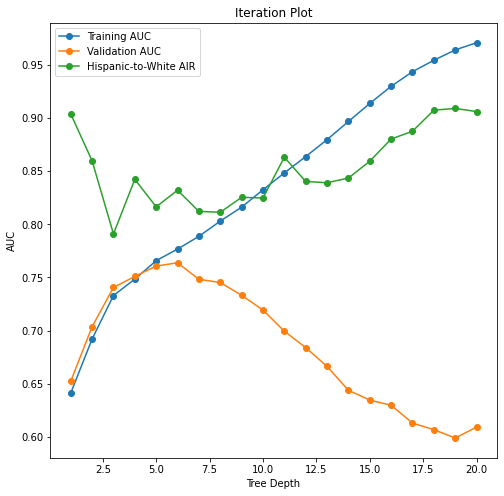

In [ ]:
# plot tree depth vs. training and validation AUC and AIR
# using simple pandas plotting and matplotlib
adv_candidate_results = pd.DataFrame.from_dict(adv_candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = adv_candidate_results[['Training AUC', 'Validation AUC', 'Hispanic-to-White AIR']].plot(title='Iteration Plot', 
                                                                                        marker='o', 
                                                                                        ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')


In [ ]:
adv_candidate_results

Model  Training AUC  \
1   DecisionTreeClassifier(max_depth=1, random_sta...      0.641367   
2   DecisionTreeClassifier(max_depth=2, random_sta...      0.692113   
3   DecisionTreeClassifier(max_depth=3, random_sta...      0.733044   
4   DecisionTreeClassifier(max_depth=4, random_sta...      0.748443   
5   DecisionTreeClassifier(max_depth=5, random_sta...      0.765782   
6   DecisionTreeClassifier(max_depth=6, random_sta...      0.776733   
7   DecisionTreeClassifier(max_depth=7, random_sta...      0.788668   
8   DecisionTreeClassifier(max_depth=8, random_sta...      0.802992   
9   DecisionTreeClassifier(max_depth=9, random_sta...      0.816080   
10  DecisionTreeClassifier(max_depth=10, random_st...      0.832419   
11  DecisionTreeClassifier(max_depth=11, random_st...      0.848311   
12  DecisionTreeClassifier(max_depth=12, random_st...      0.863631   
13  DecisionTreeClassifier(max_depth=13, random_st...      0.879547   
14  DecisionTreeClassifier(max_depth=14, random_st...      0.896630   
15  DecisionTreeClassifier(max_depth=15, random_st...      0.913592   
16  DecisionTreeClassifier(max_depth=16, random_st...      0.929671   
17  DecisionTreeClassifier(max_depth=17, random_st...      0.943429   
18  DecisionTreeClassifier(max_depth=18, random_st...      0.954195   
19  DecisionTreeClassifier(max_depth=19, random_st...      0.963902   
20  DecisionTreeClassifier(max_depth=20, random_st...      0.970715   

    Validation AUC  5-Fold SD  Hispanic-to-White AIR  
1         0.652452   0.007965               0.903757  
2         0.703766   0.014767               0.859659  
3         0.740628   0.009125               0.790934  
4         0.751006   0.008237               0.842215  
5         0.760682   0.013529               0.816429  
6         0.763840   0.019140               0.831999  
7         0.748281   0.014854               0.812137  
8         0.745292   0.017962               0.811290  
9         0.733223   0.019062               0.825349  
10        0.719415   0.009521               0.824719  
11        0.699499   0.014901               0.862977  
12        0.684096   0.009305               0.840306  
13        0.666395   0.013229               0.839040  
14        0.643944   0.018922               0.843479  
15        0.634721   0.015617               0.859287  
16        0.629846   0.018662               0.880159  
17        0.613150   0.023878               0.887453  
18        0.606919   0.017963               0.907257  
19        0.599065   0.017561               0.908921  
20        0.609386   0.010017               0.905950